# [3주차] Basic Machine Learning(3)
---

# 6-1) Softmax Regression: 기본 개념 소개

## Logistic regression
H(x) = Wx
- 리턴 값이 실수이기 때문에 binary classification(0/1)에 적합하지 않음 <br/>
- **g(z) =  sigmoid (logistic) 함수** 를 통해 1과 0 사이로 값을 압축해서 변형

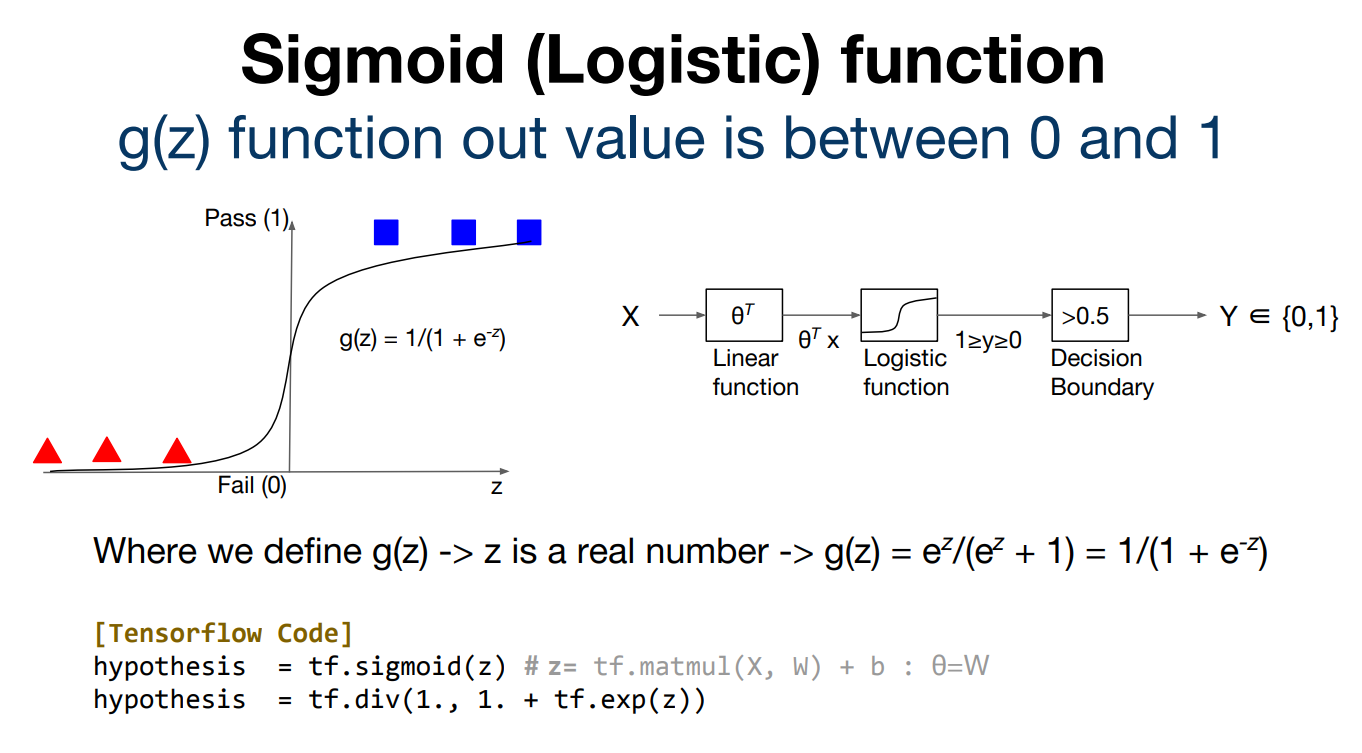

H(x) = ^y (y hat) 으로 표시

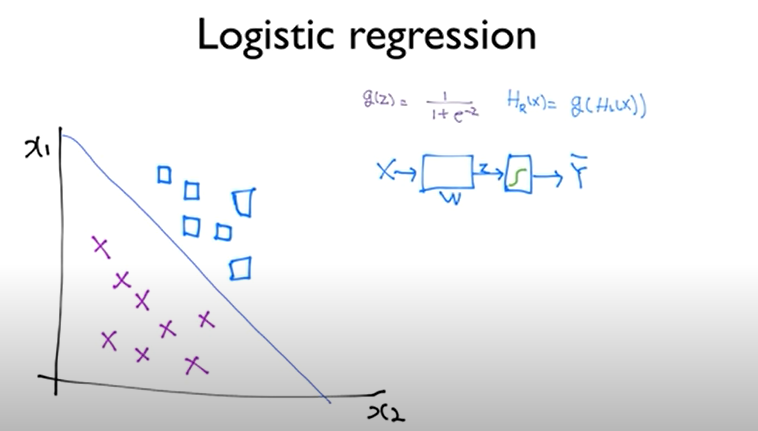

x는 2개의 값(x1, x2)이 있고, ㅁ와 x를 분류해야 할때 w를 학습한다는 의미는 (=logisitic classification 학습)는 이 둘을 구분하는 선을 찾는다는 뜻이다.

---
## Multinomial classification
- 여러개의 클래스가 존재
- a or not a / b or not b / c or not c로 3번의 binary classification로 학습 가능

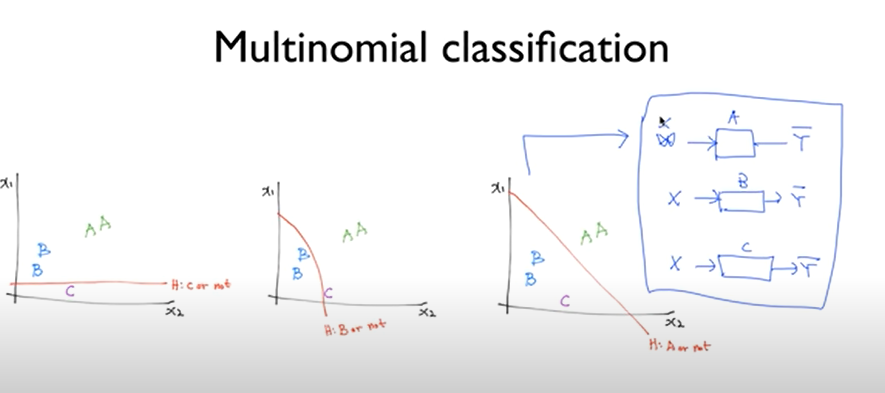

다음과 같이 독립된 3개의 H(x)를 행렬로 구현할 수 있다.

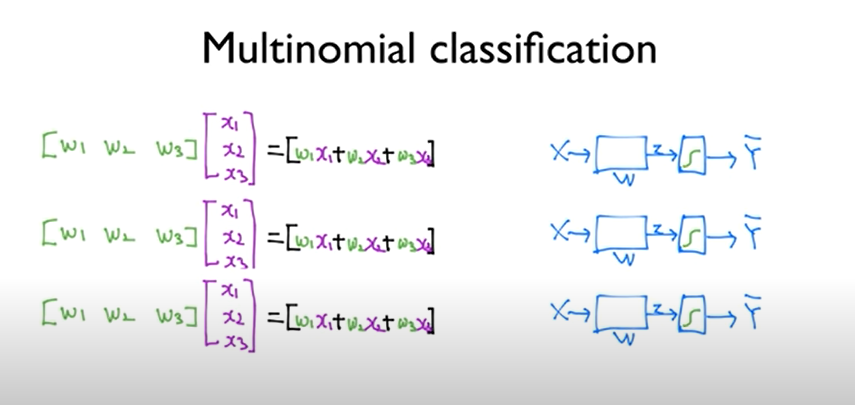

w를 하나로 합쳐서 하나의 행렬 곱으로 만든다.

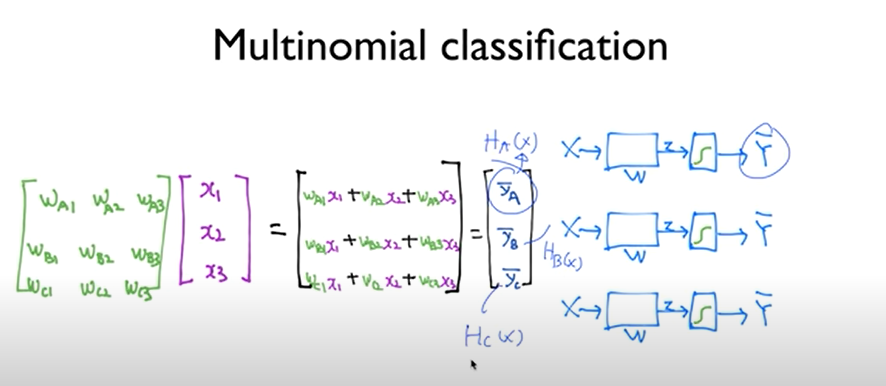

3개의 H값들에 각각 sigmoid 함수를 적용하는 것보다 간단한 방법을 한번 알아보자!

---
# 6-2) Softmax classifier의 cost 함수

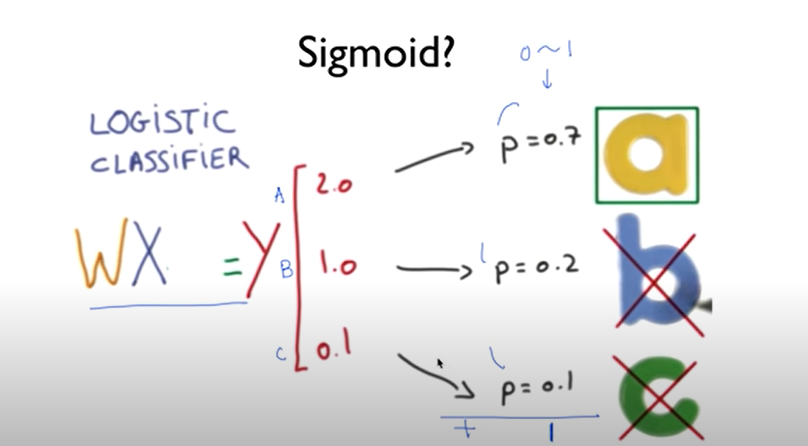

실수값을 **Sigmoid 함수**를 이용해서 0~1의 값으로 나타낼 수 있다.

## Softmax 함수
다중 클래스 분류 모델을 만들 때 사용하는 함수이다.

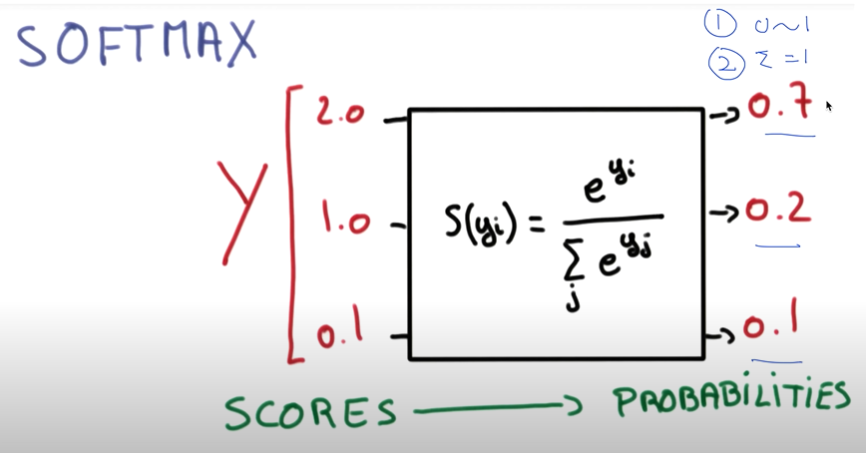

## One-Hot Encoding
- softmax 함수로 나온 예측 값 중 가장 큰 값을 1로, 나머지는 0으로 변환하는 기법
- 텐서플로우 'argmax' 함수를 통해 구현 가능

## Cross-entropy cost function


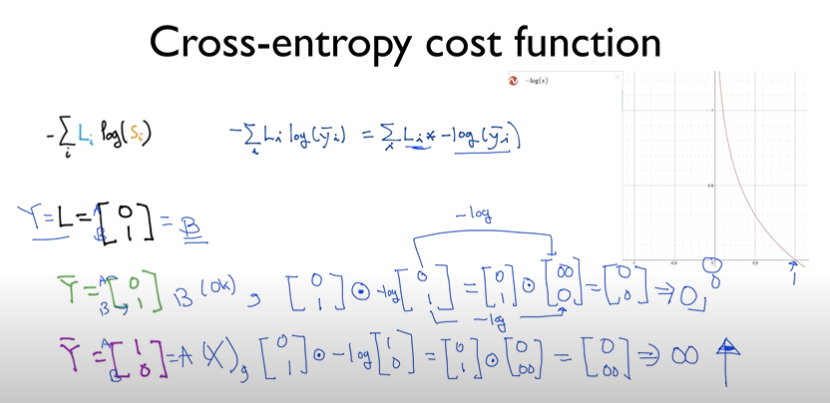

---
# Lab 06-1) Softmax Classifier

In [2]:
import tensorflow as tf
import numpy as np

tf.random.set_seed(777)

In [4]:
# sample dataset
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#convert into numpy and float format
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

nb_classes = 3 #num classes

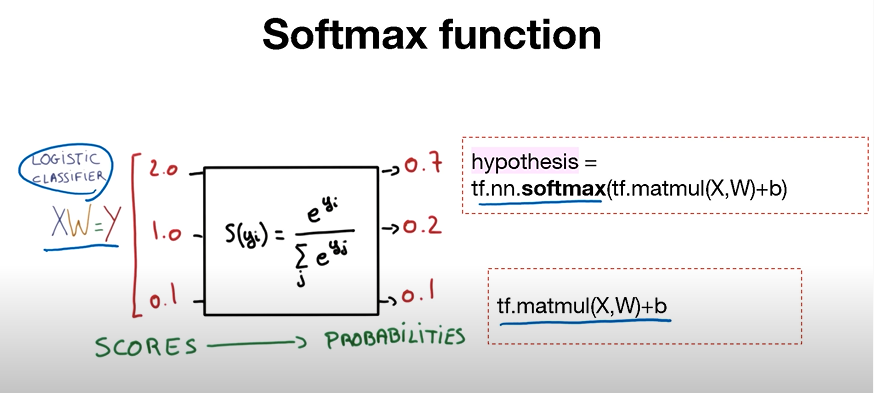

In [5]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

print(W,b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.7706481 ,  0.37335402, -0.05576323],
       [ 0.00358377, -0.5898363 ,  1.5702795 ],
       [ 0.2460895 , -0.09918973,  1.4418385 ],
       [ 0.3200988 ,  0.526784  , -0.7703731 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-1.3080608 , -0.13253094,  0.5513761 ], dtype=float32)>


In [9]:
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

print(hypothesis(x_data))

tf.Tensor(
[[1.36571964e-02 7.90162385e-03 9.78441238e-01]
 [3.92597765e-02 1.70347411e-02 9.43705440e-01]
 [3.80385250e-01 1.67723164e-01 4.51891571e-01]
 [3.23390484e-01 5.90759404e-02 6.17533624e-01]
 [3.62997389e-06 6.20727292e-08 9.99996305e-01]
 [2.62520202e-02 1.07279625e-02 9.63019967e-01]
 [1.56525111e-05 4.21802753e-07 9.99983907e-01]
 [2.94076904e-06 3.81133276e-08 9.99997020e-01]], shape=(8, 3), dtype=float32)


In [10]:
def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    
    return cost_mean # cost 평균

print(cost_fn(x_data, y_data))

tf.Tensor(6.07932, shape=(), dtype=float32)


In [11]:
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables) # W,b 를 의미

        return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.06914607, -0.6509784 ,  0.5818323 ],
       [-1.5221257 , -1.214863  ,  2.7369885 ],
       [-1.2473828 , -1.7611003 ,  3.008483  ],
       [-1.2014606 , -1.8659233 ,  3.0673838 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.15212913, -0.34219202,  0.4943211 ], dtype=float32)>]


In [13]:
def fit(X, Y, epochs=2000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            
fit(x_data, y_data) 

Loss at epoch 1: 0.159427
Loss at epoch 100: 0.154003
Loss at epoch 200: 0.148872
Loss at epoch 300: 0.144060
Loss at epoch 400: 0.139539
Loss at epoch 500: 0.135282
Loss at epoch 600: 0.131269
Loss at epoch 700: 0.127480
Loss at epoch 800: 0.123896
Loss at epoch 900: 0.120501
Loss at epoch 1000: 0.117282
Loss at epoch 1100: 0.114225
Loss at epoch 1200: 0.111319
Loss at epoch 1300: 0.108553
Loss at epoch 1400: 0.105917
Loss at epoch 1500: 0.103402
Loss at epoch 1600: 0.101001
Loss at epoch 1700: 0.098705
Loss at epoch 1800: 0.096509
Loss at epoch 1900: 0.094406
Loss at epoch 2000: 0.092391


In [14]:
a = hypothesis(x_data)

print(a)
print(tf.argmax(a, 1))
print(tf.argmax(y_data, 1))

tf.Tensor(
[[2.9436576e-08 1.5021162e-04 9.9984968e-01]
 [4.3665600e-04 4.6358574e-02 9.5320475e-01]
 [9.5460029e-10 9.6163996e-02 9.0383601e-01]
 [2.2774590e-07 9.1306245e-01 8.6937323e-02]
 [1.6050805e-01 8.3273578e-01 6.7562363e-03]
 [8.4970482e-02 9.1502678e-01 2.6765094e-06]
 [8.2284755e-01 1.7714915e-01 3.2996616e-06]
 [9.6834612e-01 3.1653885e-02 1.4557876e-08]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


---
# Lab 06-2) Softmax Classifier: Animal Classification

In [18]:
import tensorflow as tf
import numpy as np
#tf.enable_eager_execution()
tf.random.set_seed(777)

In [19]:
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.int32) #tf1.13.1에서는 np.int32, 이전에는 np.float32
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

nb_classes = 7  # 0 ~ 6


Y_one_hot = tf.one_hot(list(y_data), nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])


OSError: data-04-zoo.csv not found.

In [20]:
#Weight and bias setting
W = tf.Variable(tf.random.normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables = [W, b]

# tf.nn.softmax computes softmax activations
def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,
                                                           labels=Y)
    cost = tf.reduce_mean(cost_i)
    
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy

print(x_data, y_data)

[[1. 2. 1. 1.]
 [2. 1. 3. 2.]
 [3. 1. 3. 4.]
 [4. 1. 5. 5.]
 [1. 7. 5. 5.]
 [1. 2. 5. 6.]
 [1. 6. 6. 6.]
 [1. 7. 7. 7.]] [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [24]:
def fit(X, Y, epochs=500, verbose=50):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            print('Loss & Acc at {} epoch {}, {}'.format(i+1, loss,acc))
            
fit(x_data,Y_one_hot)

NameError: name 'Y_one_hot' is not defined